In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix


In [4]:
df = pd.read_csv('iris.csv')
df


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [12]:
x = df.drop(['species'], axis = 1)
y = df['species']

display(x)
display(y.unique())

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)

In [7]:
model = SVC(kernel='linear', decision_function_shape='ovr')
model.fit(x_train, y_train)

SVC(kernel='linear')

In [8]:
y_pred = model.predict(x_test)

In [10]:
display(classification_report(y_test, y_pred))

'              precision    recall  f1-score   support\n\n      setosa       1.00      1.00      1.00        10\n  versicolor       1.00      1.00      1.00         9\n   virginica       1.00      1.00      1.00        11\n\n    accuracy                           1.00        30\n   macro avg       1.00      1.00      1.00        30\nweighted avg       1.00      1.00      1.00        30\n'

In [11]:
cm = confusion_matrix(y_test, y_pred)

display(cm)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

In [14]:
display(x.head(5))
display(y.unique())

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


array(['setosa', 'versicolor', 'virginica'], dtype=object)

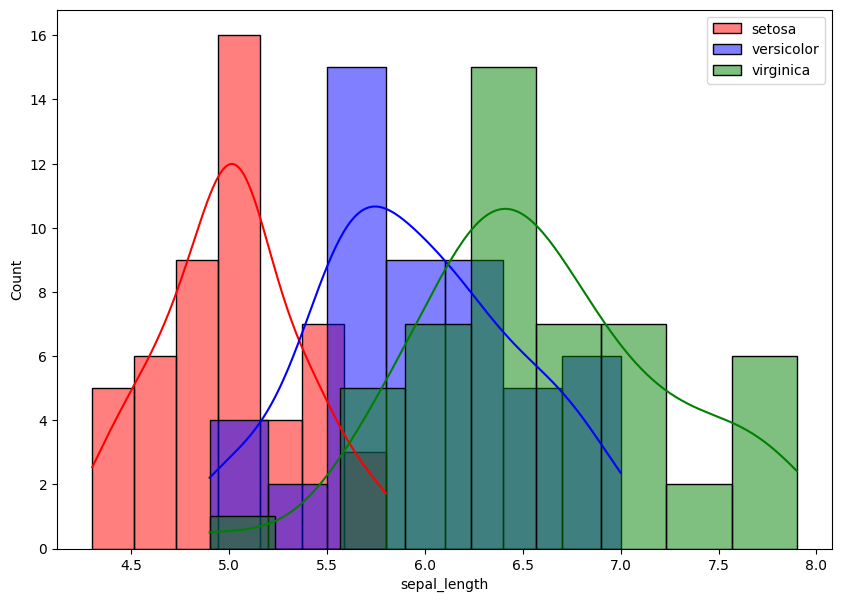

In [16]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.figure(figsize = (10,7))
sns.histplot(x[df['species'] == 'setosa']['sepal_length'], color = 'red', label = 'setosa', kde = True)
sns.histplot(x[df['species'] == 'versicolor']['sepal_length'], color = 'blue', label = 'versicolor', kde = True)
sns.histplot(x[df['species'] == 'virginica']['sepal_length'], color = 'green', label = 'virginica', kde = True)
plt.legend()
plt.show()

In [19]:
from sklearn.metrics import precision_score, recall_score, f1_score

prc_per_class = precision_score(y_test, y_pred, average = None, labels=df['species'].unique())
rec_per_class = recall_score(y_test, y_pred, average = None, labels=df['species'].unique())
f1_per_class = f1_score(y_test, y_pred, average = None, labels=df['species'].unique())

eval_per_class = pd.DataFrame({'precision' : prc_per_class, 'recall' : rec_per_class, 'f1-score' : f1_per_class}, index = df['species'].unique())
display(eval_per_class)

,precision,recall,f1-score
setosa,1.0,1.0,1.0
versicolor,1.0,1.0,1.0
virginica,1.0,1.0,1.0
